# データを読み込み

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#データのを選択
data_width = "wide"
# data_width = "detail"
dataname = "CH_data"
alldata = "test"

In [11]:
log = {}
if data_width == "wide":
    dropout_vals = [0.0, 0.2, 0.4, 0.6]
elif data_width == "detail":
    dropout_vals = [0.3, 0.34, 0.38, 0.42, 0.46]
else:
    print("data_width is wide or detail")
    exit()

# ファイル名のリスト
filenames = [f"result/dropout/{dataname}_dropout{dropout_val}_predict_{alldata}.txt" for dropout_val in dropout_vals]

# 各ファイルからデータを読み込み、データフレームに変換
df_list = [pd.read_csv(filename, sep=" ", header=None) for filename in filenames]
# 各データフレームの名称と色
labels = [f"dropout:{dropout_val}" for dropout_val in dropout_vals]
colors = ['red', 'blue', 'green', 'yellow']
# データフレームを結合
all_df = pd.concat(df_list, axis=1)
all_df["true"] = all_df[0].iloc[:,0]
all_df.drop(0, axis=1, inplace=True)
all_df.columns = *labels, "true"
all_df.head()

,dropout:0.0,dropout:0.2,dropout:0.4,dropout:0.6,true
0,1.179079,1.139898,1.150996,1.105698,1.039322
1,2.873829,2.809079,2.682140,2.636367,2.895801
2,3.253521,3.314467,3.307696,3.349954,3.127133
3,1.223864,1.220027,1.148156,1.186041,1.041856
4,1.227378,1.131908,1.111536,1.043999,1.142526


# 各モデルごとに残差をプロット

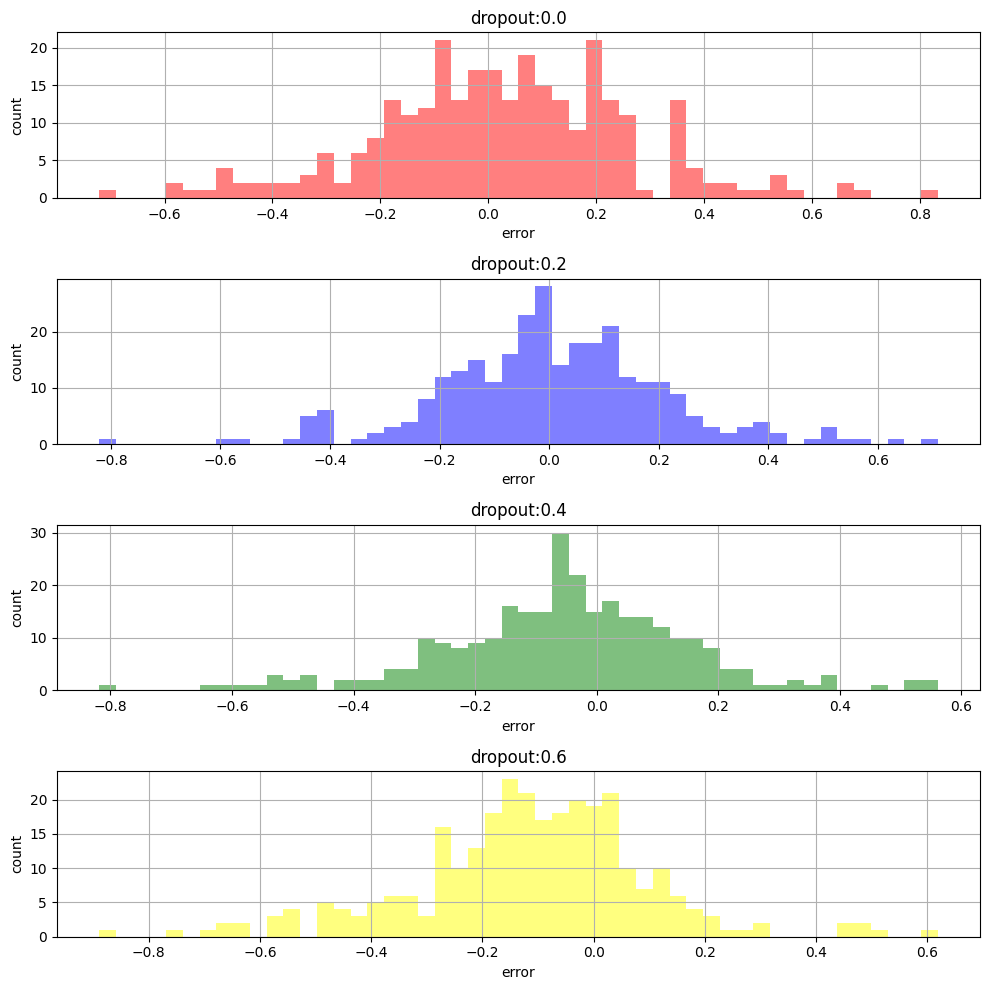

In [12]:
# set len(labels) axs
fig, axs = plt.subplots(len(labels), 1, figsize=(10, 10))
for label in labels:
    (all_df.loc[:,label] - all_df.loc[:,"true"]).plot.hist(ax=axs[labels.index(label)], bins=50, color=colors[labels.index(label)], alpha=0.5)
    axs[labels.index(label)].set_title(label)
    axs[labels.index(label)].set_xlabel("error")
    axs[labels.index(label)].set_ylabel("count")
    axs[labels.index(label)].grid(True)
plt.tight_layout()
# plt.savefig(f"result/dropout/{dataname}_dropout_{alldata}.png")
plt.show()

# エラーバーを作成
▶改善点：NumpyにFOR文を用いるのはよくない

## Max - Minでエラーバーを作成

contain_count: 97
all_count: 292
contain_rate: 0.3321917808219178


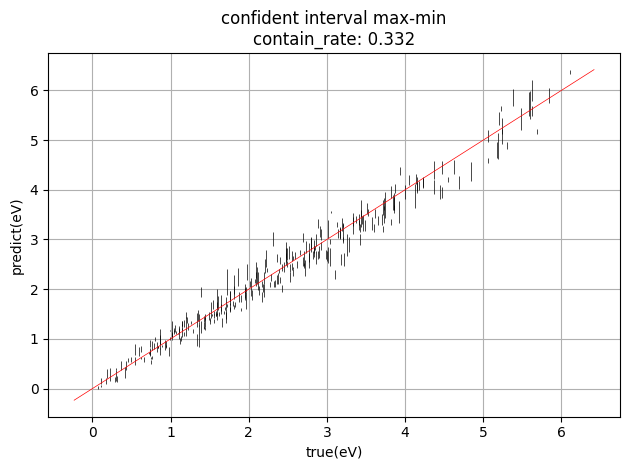

In [13]:
# 各行に対して条件を計算
true_values = all_df.iloc[:, -1]
mean_values = all_df.iloc[:, :-1].mean(axis=1)
std_values = all_df.iloc[:, :-1].std(axis=1)
lower_values = all_df.iloc[:, :-1].min(axis=1)
upper_values = all_df.iloc[:, :-1].max(axis=1)
# 条件に基づいてグラフを描画
plt.vlines(true_values, lower_values, upper_values, color='black', linewidth=0.5)
# 全体のカウント
all_count = len(true_values)
# 条件を満たす場合のカウント
contain_count = np.sum((lower_values <= true_values) & (true_values <= upper_values))

# 結果の出力
print(f"contain_count: {contain_count}")
print(f"all_count: {all_count}")
print(f"contain_rate: {contain_count / all_count}")

# 軸の名前を設定
plt.xlabel('true(eV)')
plt.ylabel('predict(eV)')
# y=xのグラフを描画
x = np.linspace(*plt.xlim())
plt.plot(x, x, color='red', linewidth=0.5)
# グリッドとタイトルを追加
plt.grid(True)
plt.title(f"confident interval max-min\ncontain_rate: {contain_count / all_count:.3f}")
# レイアウトの調整
plt.tight_layout()
# 保存と表示
plt.savefig(f"resultplot/dropout{data_width}.png")
plt.show(block=False)
plt.close()

## 信頼区間を設定してエラーバーを作成
これは各モデルのヒストグラムから残差が正規分布に従うと仮定している。  
平均+-標準偏差で信頼区間68.3%  
平均+-標準偏差*2で信頼区間95.4%  
平均+-標準偏差*3で信頼区間99.7%  

contain_count: 90
all_count: 292
contain_rate: 0.3082191780821918


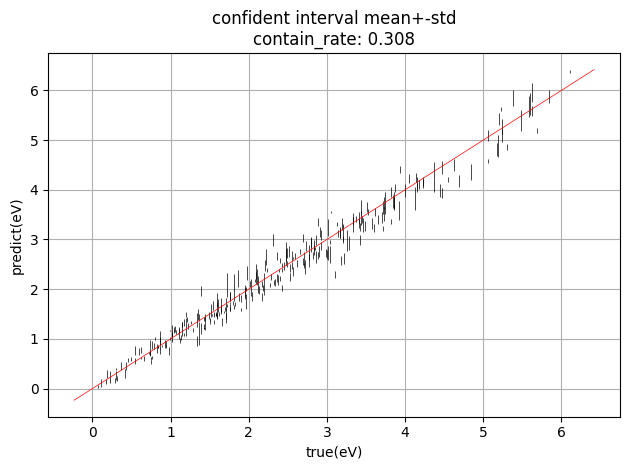

In [14]:
# 各行に対して条件を計算
true_values = all_df.iloc[:, -1]
mean_values = all_df.iloc[:, :-1].mean(axis=1)
std_values = all_df.iloc[:, :-1].std(axis=1)
lower_values = all_df.iloc[:, :-1].mean(axis=1) - all_df.iloc[:, :-1].std(axis=1)
upper_values = all_df.iloc[:, :-1].mean(axis=1) + all_df.iloc[:, :-1].std(axis=1)
# 条件に基づいてグラフを描画
plt.vlines(true_values, lower_values, upper_values, color='black', linewidth=0.5)
# 全体のカウント
all_count = len(true_values)
# 条件を満たす場合のカウント
contain_count = np.sum((lower_values <= true_values) & (true_values <= upper_values))

# 結果の出力
print(f"contain_count: {contain_count}")
print(f"all_count: {all_count}")
print(f"contain_rate: {contain_count / all_count}")

# 軸の名前を設定
plt.xlabel('true(eV)')
plt.ylabel('predict(eV)')
# y=xのグラフを描画
x = np.linspace(*plt.xlim())
plt.plot(x, x, color='red', linewidth=0.5)
# グリッドとタイトルを追加
plt.grid(True)
plt.title(f"confident interval mean+-std\ncontain_rate: {contain_count / all_count:.3f}")
# レイアウトの調整
plt.tight_layout()
# 保存と表示
plt.savefig(f"resultplot/dropout{data_width}.png")
plt.show(block=False)
plt.close()

contain_count: 169
all_count: 292
contain_rate: 0.5787671232876712


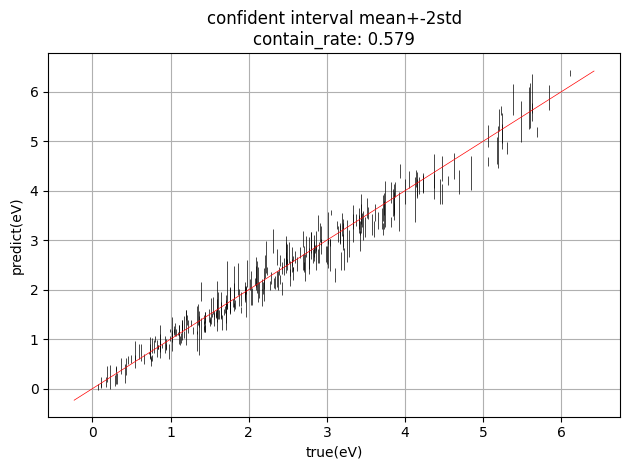

In [15]:
# 各行に対して条件を計算
true_values = all_df.iloc[:, -1]
mean_values = all_df.iloc[:, :-1].mean(axis=1)
std_values = all_df.iloc[:, :-1].std(axis=1)
lower_values = all_df.iloc[:, :-1].mean(axis=1) - all_df.iloc[:, :-1].std(axis=1) *2
upper_values = all_df.iloc[:, :-1].mean(axis=1) + all_df.iloc[:, :-1].std(axis=1) *2
# 条件に基づいてグラフを描画
plt.vlines(true_values, lower_values, upper_values, color='black', linewidth=0.5)
# 全体のカウント
all_count = len(true_values)
# 条件を満たす場合のカウント
contain_count = np.sum((lower_values <= true_values) & (true_values <= upper_values))

# 結果の出力
print(f"contain_count: {contain_count}")
print(f"all_count: {all_count}")
print(f"contain_rate: {contain_count / all_count}")

# 軸の名前を設定
plt.xlabel('true(eV)')
plt.ylabel('predict(eV)')
# y=xのグラフを描画
x = np.linspace(*plt.xlim())
plt.plot(x, x, color='red', linewidth=0.5)
# グリッドとタイトルを追加
plt.grid(True)
plt.title(f"confident interval mean+-2std\ncontain_rate: {contain_count / all_count:.3f}")
# レイアウトの調整
plt.tight_layout()
# 保存と表示
plt.savefig(f"resultplot/dropout{data_width}.png")
plt.show(block=False)
plt.close()

contain_count: 221
all_count: 292
contain_rate: 0.7568493150684932


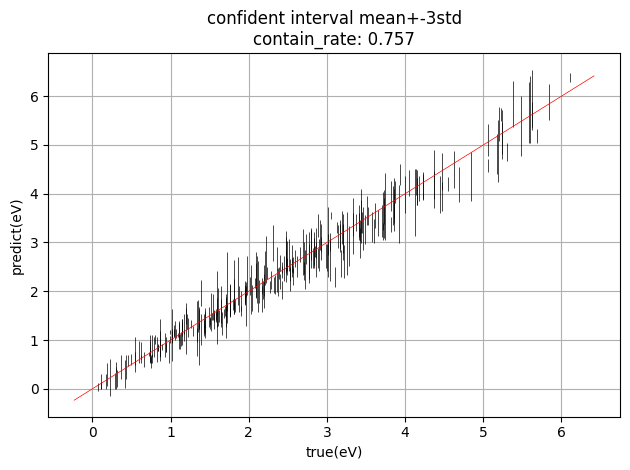

In [16]:
# 各行に対して条件を計算
true_values = all_df.iloc[:, -1]
mean_values = all_df.iloc[:, :-1].mean(axis=1)
std_values = all_df.iloc[:, :-1].std(axis=1)
lower_values = all_df.iloc[:, :-1].mean(axis=1) - all_df.iloc[:, :-1].std(axis=1) *3
upper_values = all_df.iloc[:, :-1].mean(axis=1) + all_df.iloc[:, :-1].std(axis=1) *3
# 条件に基づいてグラフを描画
plt.vlines(true_values, lower_values, upper_values, color='black', linewidth=0.5)
# 全体のカウント
all_count = len(true_values)
# 条件を満たす場合のカウント
contain_count = np.sum((lower_values <= true_values) & (true_values <= upper_values))

# 結果の出力
print(f"contain_count: {contain_count}")
print(f"all_count: {all_count}")
print(f"contain_rate: {contain_count / all_count}")

# 軸の名前を設定
plt.xlabel('true(eV)')
plt.ylabel('predict(eV)')
# y=xのグラフを描画
x = np.linspace(*plt.xlim())
plt.plot(x, x, color='red', linewidth=0.5)
# グリッドとタイトルを追加
plt.grid(True)
plt.title(f"confident interval mean+-3std\ncontain_rate: {contain_count / all_count:.3f}")
# レイアウトの調整
plt.tight_layout()
# 保存と表示
plt.savefig(f"resultplot/dropout{data_width}.png")
plt.show(block=False)
plt.close()